## I. PROBLEM STATEMENT

Hypertension, a silent killer, is the greatest concern facing global public health authorities in the 21st century. 
According to the World Health Organization, roughly 1.28 billion people between the ages of 30 and 79 suffer with  
hypertension, with the majority (two-thirds) residing in low- and middle-income countries. The American Heart Association 
believes that 46 percent of hypertensive individuals are ignorant of their condition. 
Worldwide, hypertension is the main cause of premature mortality. 

In this dataset, I will be using Exploratory data Analysis to analyze and summarize their main characteristics, with visual 
methods. Also, Applied Classification Analysis will utilized to predict whether or not a patient has a hypertension. 

## II. DATASET DESCRIPTION

This dataset is used to predict whether a patient is likely to get hypertension based on the input parameters like gender, 
age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data 

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Data File:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

### 2. Get an overview of the dataset: 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [58]:
data['gender'].replace(['Female', 'Male', 'Other'], [0, 1, 2], inplace=True)

In [59]:
data['ever_married'].replace(['Yes', 'No'], [0, 1], inplace=True)

In [60]:
data['Residence_type'].replace(['Rural', 'Urban'], [0, 1], inplace=True)

In [61]:
data['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0, 1, 2,3,4], inplace=True)

In [62]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0, 1, 2, 3 ], inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


### 3. Print the first five and last five rows of the dataset

In [64]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,0,1,0,202.21,NaN,1,1
2,31112,1,80.0,0,1,0,0,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,0,0,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,0,1,0,174.12,24.0,1,1


In [65]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,0,80.0,1,0,0,0,1,83.75,NaN,1,0
5106,44873,0,81.0,0,0,0,1,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,0,1,0,82.99,30.6,1,0
5108,37544,1,51.0,0,0,0,0,0,166.29,25.6,0,0
5109,44679,0,44.0,0,0,0,2,1,85.28,26.2,3,0


### 4. Find the summary statistics of the dataset (5 Points)

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.343836,0.475034,0.00,0.000,0.000,1.00,1.00
work_type,5110.0,0.837965,1.118698,0.00,0.000,0.000,2.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages. 

In [67]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
bmi,201,3.933464
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


### 6. Plot the nullity matrix and nullity correlation heatmap.

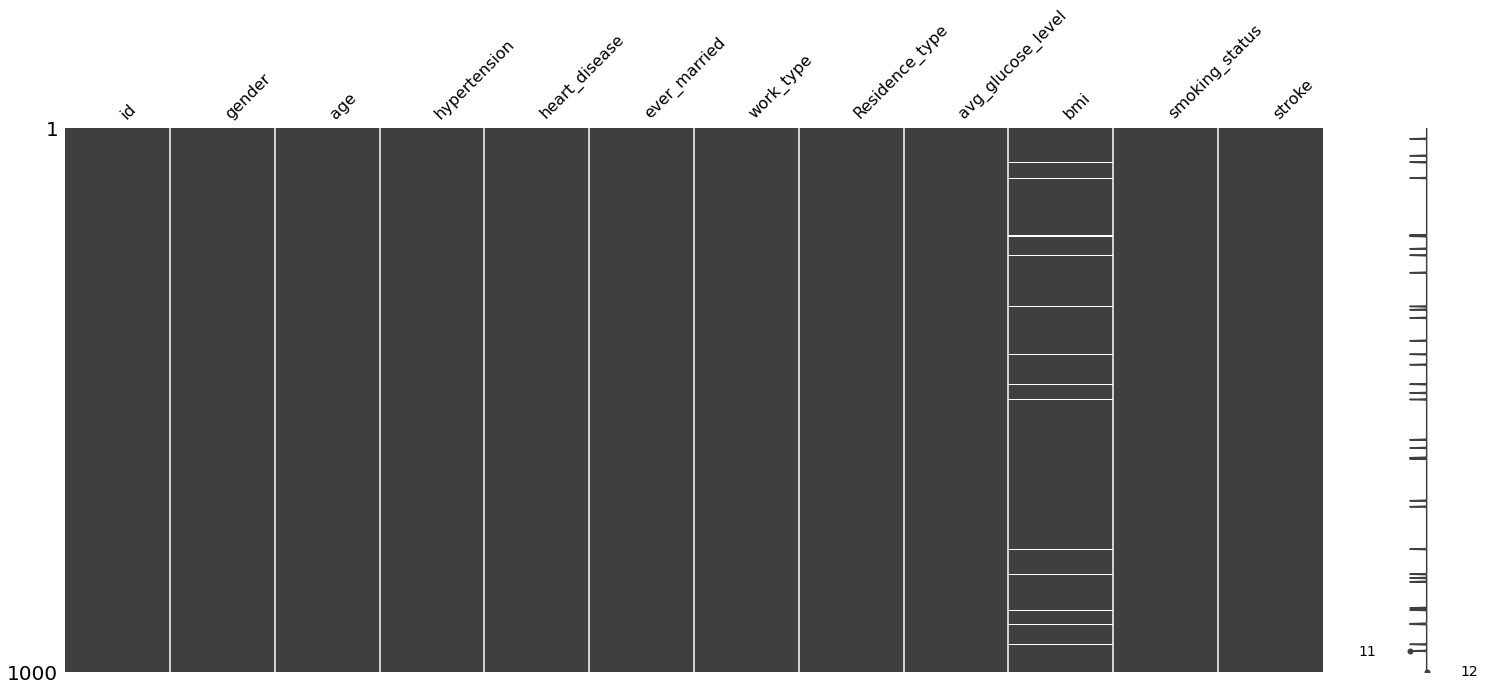

In [68]:
nullable_columns = data.columns.tolist()
msno.matrix(data[nullable_columns].sample(1000))
plt.show()

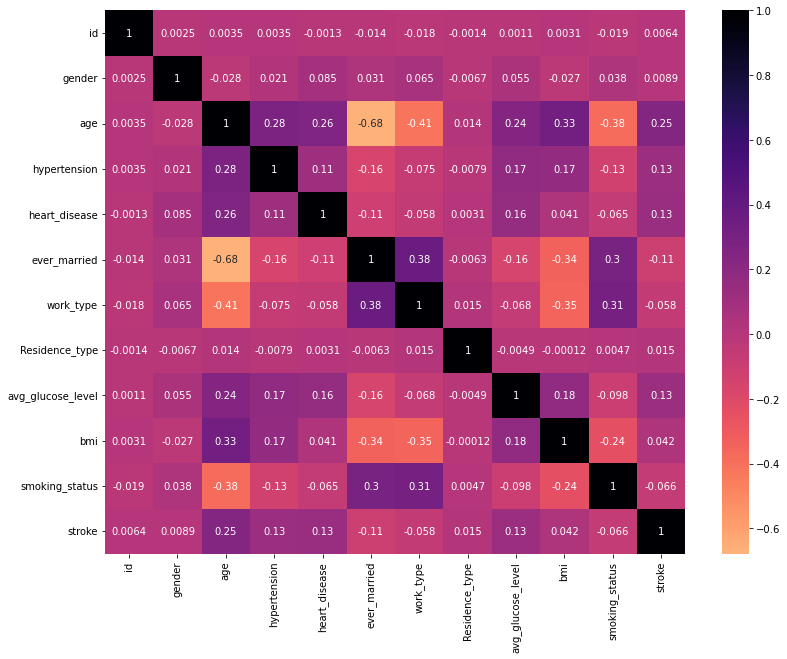

In [69]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True,center=0, cmap = "magma_r")
plt.show()

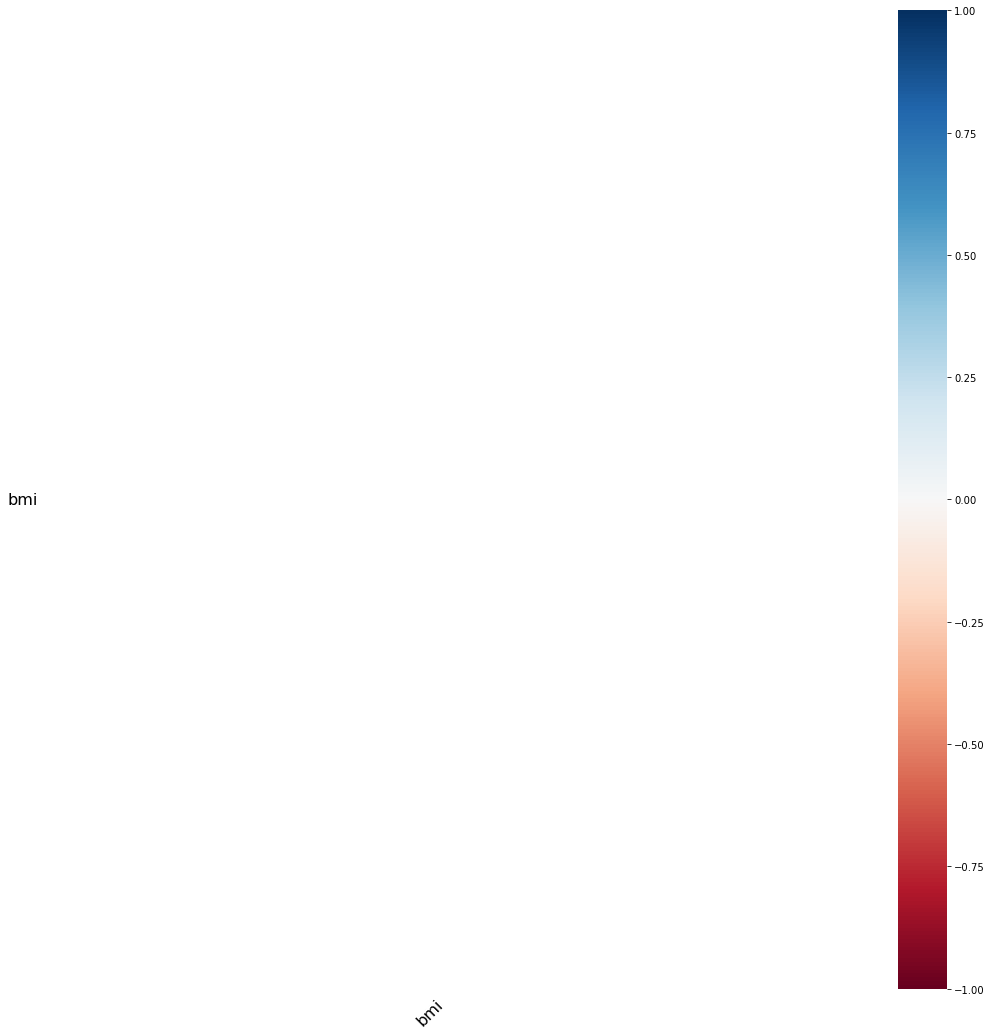

In [70]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

### 7. Delete the columns having more than 80% of values missing.

In [71]:
## N/A



### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [72]:
bmi = ['bmi']

In [73]:
mean = data['bmi'].mean()

In [74]:
data[bmi] = data[bmi].fillna(mean)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


### 9. Export the Cleaned Dataset.

In [76]:
data.to_csv("CleanedData.csv")

## IV.  AI MODELLING 

#### IF REGRESSION: Use Applied Regression Analysis (ACA) using ENSEMBLE
#### IF CLASSIFICATION: Use Applied Classification Analysis (ACA) using ENSEMBLE

### 1. Import the required dependencies. (5 Points)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

### 2. Read the cleaned data.

In [78]:
data_new = pd.read_csv('CleanedData.csv')
data_new

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,0,0,1,228.69,36.600000,0,1
1,1,51676,0,61.0,0,0,0,1,0,202.21,28.893237,1,1
2,2,31112,1,80.0,0,1,0,0,0,105.92,32.500000,1,1
3,3,60182,0,49.0,0,0,0,0,1,171.23,34.400000,2,1
4,4,1665,0,79.0,1,0,0,1,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,0,80.0,1,0,0,0,1,83.75,28.893237,1,0
5106,5106,44873,0,81.0,0,0,0,1,1,125.20,40.000000,1,0
5107,5107,19723,0,35.0,0,0,0,1,0,82.99,30.600000,1,0
5108,5108,37544,1,51.0,0,0,0,0,0,166.29,25.600000,0,0


### 3. Divide the dataset into train and validation DataFrames.



In [79]:
data_new.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [80]:
x=data_new.drop(["hypertension"],axis=True)
y=data_new["hypertension"]

In [81]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.20,random_state=11)

In [82]:
print("input - training set :", x_train.shape)
print("output - training set :", y_train.shape)
print("output - training set :", x_val.shape)
print("output - training set :", y_val.shape)

input - training set : (4088, 12)
output - training set : (4088,)
output - training set : (1022, 12)
output - training set : (1022,)


### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers/regressor and 1 stacked 

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

In [83]:
## Insert your code here:
#List Hyperparameters that we want to tune.
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.20,random_state=11)

# KNN

In [84]:
params_knn = {
    "leaf_size": list(range(1,30)),
    "n_neighbors": list(range(1,50)),
    "p": [1,2]
}

In [85]:
from sklearn.model_selection import GridSearchCV

grid_search_kn = GridSearchCV(KNeighborsClassifier(), params_knn, verbose=1, cv=5)
grid_search_kn.fit(x_train, y_train);
print ("Best Score: ", grid_search_kn.best_score_)
print ("Best Parameters: ", grid_search_kn.best_params_)
print ("Best Estimator: ", grid_search_kn.best_estimator_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
Best Score:  0.9041097940165134
Best Parameters:  {'leaf_size': 1, 'n_neighbors': 12, 'p': 1}
Best Estimator:  KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1)


# Decision Tree

In [86]:
decision_tree = DecisionTreeClassifier()
param_dict = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}
grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [87]:
grid.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [88]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2)

In [89]:
grid.best_score_

0.9041097940165134

# Logistic Regression 

In [109]:
params_lr = {"C":np.logspace(-3,3,7), "penalty":["l2"], "max_iter":[1000]}

In [110]:
grid_search_lr = GridSearchCV(LogisticRegression(random_state=11), params_lr, cv=10)
grid_search_lr.fit(x_train, y_train)
print ("Best Score: ", grid_search_lr.best_score_)
print ("Best Parameters: ", grid_search_lr.best_params_)
print ("Best Estimator: ", grid_search_lr.best_estimator_)

Best Score:  0.9038646387650415
Best Parameters:  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(C=0.001, max_iter=1000, random_state=11)


In [92]:
kneighbors_params = {
    'leaf_size': 28, 
    'n_neighbors': 1,
    'p': 1
}

In [93]:
decisiontree_params = {
    'max_leaf_nodes': 8, 
    'min_samples_split': 2
}

In [94]:
logisticregression_params = {
    'C': 1.0, 
    'penalty': 'l2'
}

### 5. Calculate the performance and use a metric accordingly

In [95]:
knn = KNeighborsClassifier(**kneighbors_params)
knn.fit(x_train, y_train)
knnpred_val = knn.predict(x_val)
accuracyscore = accuracy_score(y_val, knnpred_val)
precisionscore = precision_score(y_val, knnpred_val, average='weighted')
recallscore = recall_score(y_val, knnpred_val, average='macro')
f1score = f1_score(y_val, knnpred_val, average = 'micro')
cm_rf = confusion_matrix(y_val, knnpred_val)
print("--RANDOM FOREST CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore*100)
print("Precision: ", precisionscore*100)
print("Recall: ", recallscore*100)
print("F1-Score: ", f1score*100)
print("Confusion Matrix: \n", cm_rf)

--RANDOM FOREST CLASSIFIER RESULTS--
Accuracy:  83.85518590998043
Precision:  82.31859846758837
Recall:  52.20194446733131
F1-Score:  83.85518590998042
Confusion Matrix: 
 [[844  72]
 [ 93  13]]


In [96]:
dt = DecisionTreeClassifier(**decisiontree_params, random_state=11)
dt.fit(x_train, y_train)
dtpred_val = dt.predict(x_val)
accuracyscore1 = accuracy_score(y_val, dtpred_val)
precisionscore1 = precision_score(y_val, dtpred_val, average='weighted')
recallscore1 = recall_score(y_val, dtpred_val, average='weighted')
f1score1 = f1_score(y_val, dtpred_val, average = 'micro')
cm_rf1 = confusion_matrix(y_val, dtpred_val)
print("--DECISION TREE CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore1*100)
print("Precision: ", precisionscore1*100)
print("Recall: ", recallscore1*100)
print("F1-Score: ", f1score1*100)
print("Confusion Matrix: \n", cm_rf1)

--DECISION TREE CLASSIFIER RESULTS--
Accuracy:  89.33463796477496
Precision:  82.4488971246154
Recall:  89.33463796477496
F1-Score:  89.33463796477496
Confusion Matrix: 
 [[912   4]
 [105   1]]


In [97]:
estimator_list = [
    ('knn', knn),
    ('dt', dt),
     ]
stacked_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(**logisticregression_params))
stacked_model.fit(x_train, y_train)
stacked_preds_val = stacked_model.predict(x_val)
accuracyscore2 = accuracy_score(y_val, stacked_preds_val)
precisionscore2 = precision_score(y_val, stacked_preds_val, average='micro')
recallscore2 = recall_score(y_val, stacked_preds_val, average='micro')
f1score2 = f1_score(y_val, stacked_preds_val, average = 'micro')
cm_rf2 = confusion_matrix(y_val, stacked_preds_val)
print("--STACKED MODEL RESULTS--")
print("Accuracy: ", accuracyscore2*100)
print("Precision: ", precisionscore2*100)
print("Recall: ", recallscore2*100)
print("F1-Score: ", f1score2*100)
print("Confusion Matrix: \n", cm_rf2)

--STACKED MODEL RESULTS--
Accuracy:  89.33463796477496
Precision:  89.33463796477496
Recall:  89.33463796477496
F1-Score:  89.33463796477496
Confusion Matrix: 
 [[912   4]
 [105   1]]


### 6. Plot the performane accordingly, use the appropriate plotting: 

In [98]:
y_val.replace([2],[1],inplace=True)

In [99]:
r_probs = [0 for _ in range(len(y_val))]
knearestneighbors_probs = knn.predict_proba(x_val)
decisiontree_probs = dt.predict_proba(x_val)
stackedmodel_probs = stacked_model.predict_proba(x_val)

In [100]:
knearestneighbors_probs = knearestneighbors_probs[:, 1]
decisiontree_probs = decisiontree_probs[:, 1]
stackedmodel_probs = stackedmodel_probs[:, 1]

In [101]:
r_auc = roc_auc_score(y_val, r_probs, multi_class = 'b')
knearetneighbors_auc = roc_auc_score(y_val, knearestneighbors_probs)
decisiontree_auc = roc_auc_score(y_val, decisiontree_probs)
stackedmodel_auc = roc_auc_score(y_val, stackedmodel_probs)

In [102]:
r_fpr, r_tpr, _ = roc_curve(y_val, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_val, knearestneighbors_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, decisiontree_probs)
sm_fpr, sm_tpr, _ = roc_curve(y_val, stackedmodel_probs)

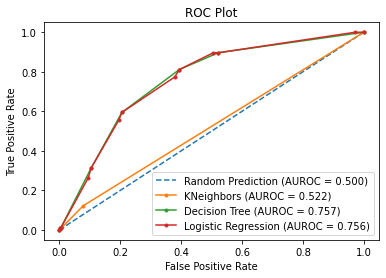

In [103]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors (AUROC = %0.3f)' % knearetneighbors_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % decisiontree_auc)
plt.plot(sm_fpr, sm_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % stackedmodel_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### 7. Test the final values on the test dataset.

In [104]:
## Insert your code here:
results = x_val.copy()
results ['Actual'] = y_val
results ['Predicted'] = stacked_model.predict(x_val)
results = results[['Actual', 'Predicted']]
results[:10]

,Actual,Predicted
3556,1,0
1317,0,0
2868,0,0
1738,0,0
2108,0,0
2285,0,0
2763,0,0
632,0,0
2379,0,0
1658,1,0


### 8. Export the Final Model using PICKLE Library.

In [105]:
## Insert your code here:
import pickle
filename = 'CpEE 402 - Final Exam - Barrientos, Jenica.pkl'
pickle.dump(stacked_model,open(filename,'wb'))